# Unsupervised Learning

In [1]:
'''
clustering
    1. K-means clustering algorithm
        here k = means no. of clusters and means = means how many pattern is given in dataset
    2. hierarchical clustering.
        1. Agglomerative H. C. (bottom to top)
        2. Divisive dr
'''

'\nclustering\n    1. K-means clustering algorithm\n        here k = means no. of clusters and means = means how many pattern is given in dataset\n'

In [2]:
#importing basic library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#laoding dataset mall.csv
df=pd.read_csv("mall.csv")
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
#checking null values
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

<AxesSubplot:>

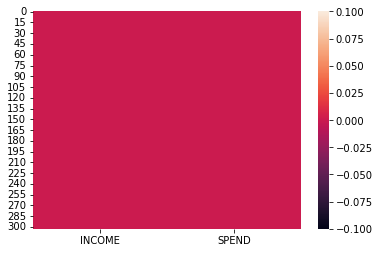

In [5]:
#visualizing null values
sb.heatmap(df.isnull())

In [6]:
#cross checking with data types
df.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [7]:
#checking duplicate values
df.duplicated().sum()

7

In [8]:
#removing duplicated values
df.drop_duplicates(inplace=True)

In [9]:
#again checking duplicated 
df.duplicated().sum()

0

In [10]:
#select input 
X=df.copy()  #here copy() will store df as it is in X 

In [11]:
#applying scaling to make data into 1 unit 
from sklearn.preprocessing import StandardScaler

In [12]:
#creating object of standardscaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [13]:
X

array([[-0.26035663,  0.02186759],
       [ 0.08910044,  1.62920884],
       [-0.8564893 ,  0.97758401],
       [-0.19868774,  1.23823394],
       [ 2.22695551,  0.58660911],
       [-1.10316488, -0.06501572],
       [ 0.99357759,  0.15219256],
       [ 0.35633233,  1.02102567],
       [-0.95927079,  0.54316746],
       [-1.59651605,  1.06446732],
       [-0.13701884,  0.45628415],
       [ 0.60300791, -0.45599062],
       [ 0.41800122,  0.93414236],
       [-0.71259521, -0.23878234],
       [ 0.7674583 ,  0.54316746],
       [-0.54814482,  0.36940083],
       [ 1.93916733,  0.97758401],
       [-0.40425073, -1.54203201],
       [ 0.02743155,  0.93414236],
       [-0.13701884,  0.06530925],
       [-0.23980034,  0.4997258 ],
       [-0.26035663,  1.2816756 ],
       [-0.40425073,  1.23823394],
       [-0.05479365, -0.54287393],
       [-0.95927079,  1.23823394],
       [ 1.15802798,  0.54316746],
       [-0.69203891,  0.32595918],
       [-1.45262196, -1.15105711],
       [ 3.52200233,

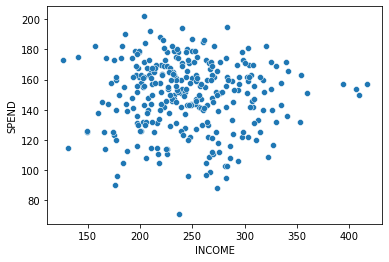

In [14]:
#creating scater plot between income and spend
sb.scatterplot(data=df,x="INCOME",y="SPEND")
plt.show()

In [15]:
#here we cant identify no. of clusters in data set 
#so now we will use Elbow Technique to identify the no. of clusters in data set 
#i.e. K in given data

In [16]:
#calling in-built class KMeans and this class is in package sklearn
from sklearn.cluster import KMeans

In [17]:
#using Elbow method,
#suppose we assume total 20 clusters
k_range=range(1,21) #start = 1, stop = 21-1=20, step = 1 

#declaring empty list for sum of squared error 
sse=[]  

#declaring empty list for value of k
k_cluster=[]

for k in k_range:
    #creating object of KMeans
    km=KMeans(n_clusters=k,random_state=1)   #here n_cluster is in-built parameter to take value of k
    #train the model - using inbuilt method fit() method of KMeans
    km.fit(X)
    #sum of squared error  - inbuilt method inertia_ which is defined in KMeans class
    #formula of SSE = sum(centerpoint - datapoints)^2
    #to add inertia_ for each value of k
    sse.append(km.inertia_)
    #to add value of k in K_cluster list 
    k_cluster.append(k)




In [18]:
#creating dictionary to store sse and K_cluster
dict={"K":k_cluster,"SSE":sse}
#converting dictionary into dataframe
df1=pd.DataFrame(dict)
df1

,K,SSE
0,1,592.000000
1,2,391.315497
2,3,247.292367
3,4,193.836346
4,5,152.315673
5,6,128.583208
6,7,112.561278
7,8,99.538230
8,9,89.071835
9,10,78.962854


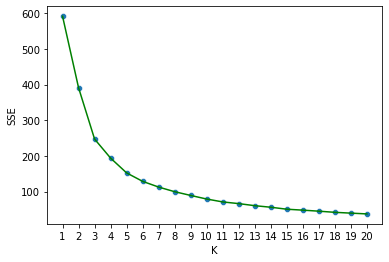

In [19]:
#creating scatter plot to visualize K and SSE
sb.scatterplot(data=df1,x="K",y="SSE")
sb.lineplot(data=df1,x="K",y="SSE",color="green")
plt.xticks(k_range)
plt.show()

In [20]:
#here we can clearly understand the no. of cluster in given data set is 5 according to elbow method
#now creating object of KMeans class
km=KMeans(n_clusters=5,random_state=1)

In [21]:
#train and predict  - use inbuilt method fit_predict() od KMeans class
Y_pred=km.fit_predict(X)

In [22]:
#adding new column in existing dataset 
df['Target']=Y_pred
#df.head(10)
#creating object of standardscaler class
ss=StandardScaler()
df['INCOME']=ss.fit_transform(df[['INCOME']])
df['SPEND']=ss.fit_transform(df[['SPEND']])

In [23]:
df.head()

,INCOME,SPEND,Target
0,-0.260357,0.021868,1
1,0.089100,1.629209,4
2,-0.856489,0.977584,4
3,-0.198688,1.238234,4
4,2.226956,0.586609,0


In [24]:
#creating 5 dataset according to cluster
df0=df[df['Target']==0]
df1=df[df['Target']==1]
df2=df[df['Target']==2]
df3=df[df['Target']==3]
df4=df[df['Target']==4]

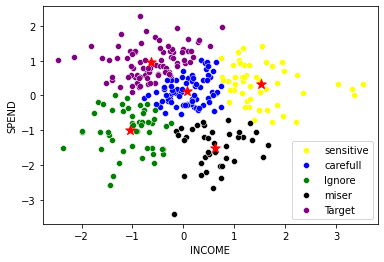

In [29]:
#vosualizing all clusters
sb.scatterplot(data=df0,x="INCOME",y='SPEND',color='yellow',label='sensitive')
sb.scatterplot(data=df1,x="INCOME",y='SPEND',color='blue',label='carefull')
sb.scatterplot(data=df2,x="INCOME",y='SPEND',color='green',label='Ignore')
sb.scatterplot(data=df3,x="INCOME",y='SPEND',color='black',label='miser')
sb.scatterplot(data=df4,x="INCOME",y='SPEND',color='purple',label='Target')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',s=100,marker='*')
plt.show()

In [26]:
#to check centeroid for each clusters, we will use inbuilt method cluster_centers_
km.cluster_centers_

array([[ 1.53097797,  0.33482482],
       [ 0.08032976,  0.12554834],
       [-1.04611067, -0.99324865],
       [ 0.6135496 , -1.50081813],
       [-0.63942457,  0.96879225]])